# SLOPE Indicator Example

In [23]:
import yfinance as yf

from mplchart.chart import Chart
from mplchart.primitives import Candlesticks, Volume

from mplchart.indicators import SLOPE, TSF, QSF
from mplchart.samples import sample_prices

In [24]:
ticker = "AAPL"
prices = yf.Ticker(ticker).history(period="5y")
prices = sample_prices()
prices.info()


$AAPL: possibly delisted; no price data found  (period=5y)


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10960 entries, 1980-12-12 to 2024-06-04
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    10960 non-null  float64
 1   high    10960 non-null  float64
 2   low     10960 non-null  float64
 3   close   10960 non-null  float64
 4   volume  10960 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 513.8 KB


In [25]:
SLOPE(20) @ prices.close


date
1980-12-12         NaN
1980-12-15         NaN
1980-12-16         NaN
1980-12-17         NaN
1980-12-18         NaN
                ...   
2024-05-29    0.862896
2024-05-30    0.681618
2024-05-31    0.539457
2024-06-03    0.556669
2024-06-04    0.538302
Name: close, Length: 10960, dtype: float64

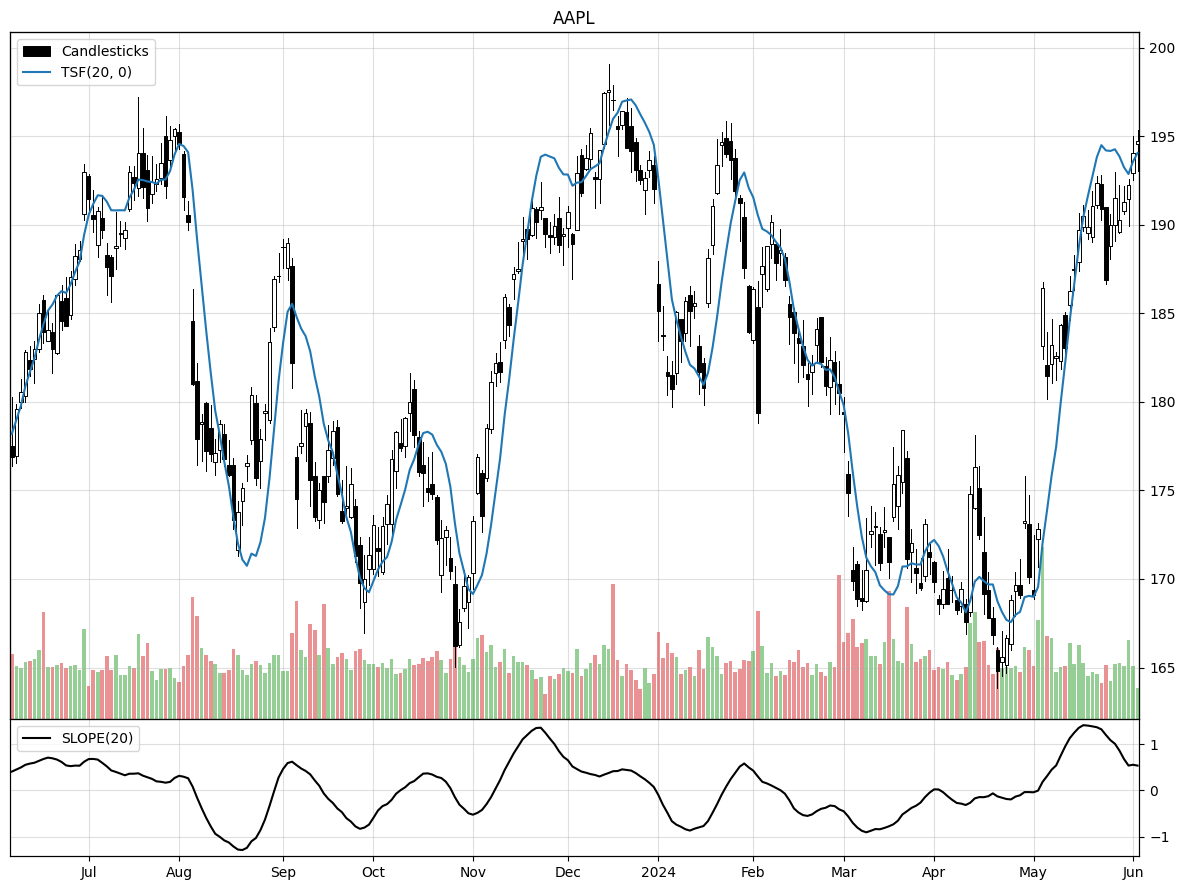

In [ ]:
max_bars = 250

indicators = [
    Candlesticks(),
    TSF(20),
    Volume(),
    SLOPE(20),
]

chart = Chart(title=ticker, max_bars=max_bars)
chart.plot(prices, indicators)